# Analisi delle onde audio

Questo notebook si concentrerà sull'analisi delle onde audio. Il fine è estrarre informazioni utili dagli audio e visualizzare graficamente le forme d'onda. 

## Importazione delle librerie necessarie

Si parte con l'installazione e l'importazione le librerie utili all'analisi e la visualizzazione dei dati.

In [1]:
import tensorflow as tf
import numpy as np
import os,random
import matplotlib.pyplot as plt
import wave

## Funzioni utilizzate
Viene implementata la funzione `samplefy`, simile a quella definita nel notebook per la creazione di spettrogrammi. 

In [6]:
def samplefy(dataset, dir_label):
    for audio, label in dataset: # iteriamo all'interno del dataset
        label_np = label.numpy() 
        
        for i in range(len(label_np)): # controlliamo per ogni label se è uguale a quella richiesta
            if label_names[label_np[i]] == dir_label:
                return audio[i], label_names[label_np[i]] # ci restituisce il campione con la sua etichetta

In [11]:
def plot_waves(dataset):
    audio1, label1 = samplefy(dataset, 'right')
    audio2, label2 = samplefy(dataset, 'right')
    audio3, label3 = samplefy(dataset, 'tree')
    audio4, label4 = samplefy(dataset, 'tree')
    
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))  # aumenta la dimensione della figura
    fig.tight_layout(pad=3.0)  # aggiungi padding tra i subplot
    
    # Primo spettrogramma
    ax[0, 0].set_ylabel('Ampiezza', fontweight="semibold")
    ax[0, 0].set_xlabel('Frame #', fontweight="semibold") 
    ax[0, 0].set_title(f"Classe: {label1}")
    ax[0, 0].plot(audio1, color="indianred")
    # rimuoviamo il limite di destra e di sopra
    ax[0, 0].spines["right"].set_visible(False)
    ax[0, 0].spines["top"].set_visible(False)
    ax[0, 0].spines["left"].set_visible(False)
    ax[0, 0].grid(True, color="gainsboro", linestyle="--", alpha=0.5)
    
    # Secondo spettrogramma
    ax[0, 1].set_ylabel('Ampiezza', fontweight="semibold")
    ax[0, 1].set_xlabel('Frame #', fontweight="semibold")
    ax[0, 1].set_title(f"Classe: {label2}")
    ax[0, 1].plot(audio2, color="indianred")
    # rimuoviamo il limite di destra e di sopra
    ax[0, 1].spines["right"].set_visible(False)
    ax[0, 1].spines["top"].set_visible(False)
    ax[0, 1].spines["left"].set_visible(False)
    ax[0, 1].grid(True, color="gainsboro", linestyle="--", alpha=0.5)
    
    # Terzo spettrogramma
    ax[1, 0].set_ylabel('Ampiezza', fontweight="semibold")
    ax[1, 0].set_xlabel('Frame #', fontweight="semibold")
    ax[1, 0].set_title(f"Classe: {label3}")
    ax[1, 0].plot(audio3, color="indianred")
    # rimuoviamo il limite di destra e di sopra
    ax[1, 0].spines["right"].set_visible(False)
    ax[1, 0].spines["top"].set_visible(False)
    ax[1, 0].spines["left"].set_visible(False)
    ax[1, 0].grid(True, color="gainsboro", linestyle="--", alpha=0.5)
    
    # Quarto spettrogramma
    ax[1, 1].set_ylabel('Ampiezza', fontweight="semibold")
    ax[1, 1].set_xlabel('Frame #', fontweight="semibold")
    ax[1, 1].set_title(f"Classe: {label4}")
    ax[1, 1].plot(audio4, color="indianred")
    # rimuoviamo il limite di destra e di sopra
    ax[1, 1].spines["right"].set_visible(False)
    ax[1, 1].spines["top"].set_visible(False)
    ax[1, 1].spines["left"].set_visible(False)
    ax[1, 1].grid(True, color="gainsboro", linestyle="--", alpha=0.5)
    
    plt.show()

## Onde audio

La prima operazione per visualizzare i grafici è quella di importare il dataset ed estrarre le label presenti. 

In [8]:
train_ds = tf.keras.utils.audio_dataset_from_directory(directory='../reduced_dataset/dataset/audio')
label_names = train_ds.class_names

Found 12933 files belonging to 30 classes.


Subito dopo si va a chiamare la funzione `plot_waves`, la quale ci permette di osservare due grafici, uno per ciascuna delle due classi. In questo modo saranno più evidenti le differenze tra le due etichette e le somiglianze tra le forme degli audio all'interno della stessa categoria.

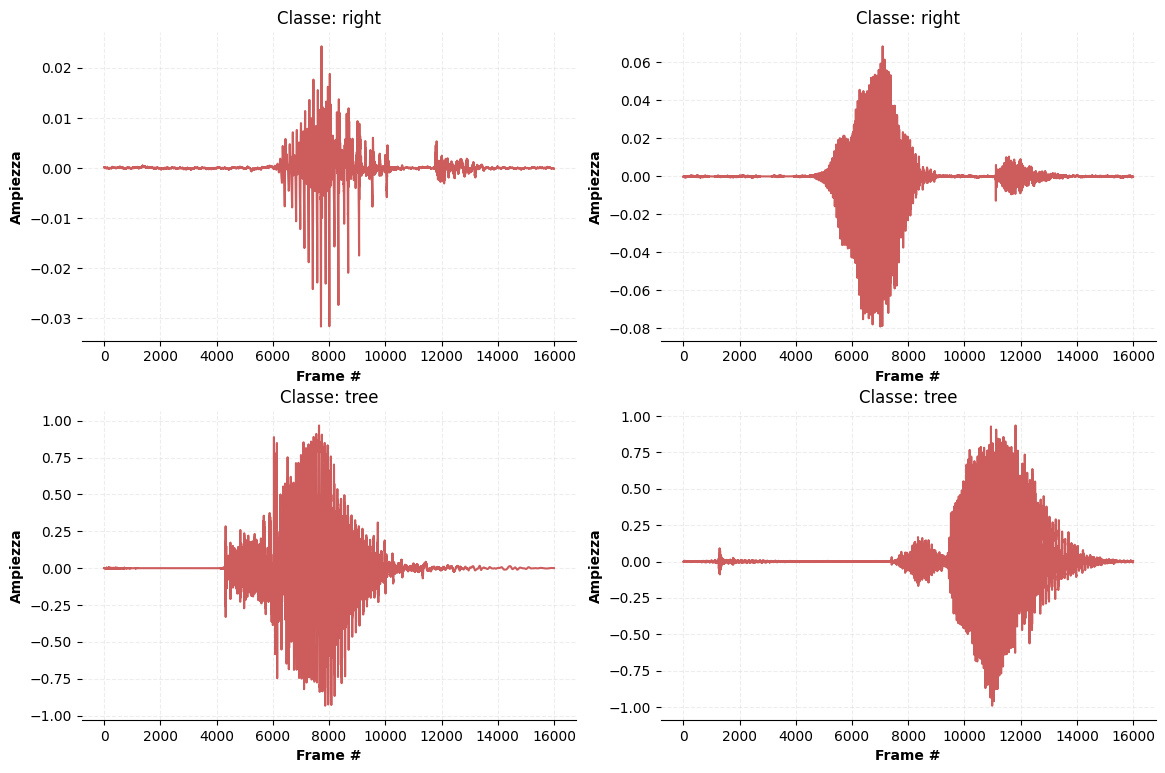

In [17]:
plot_waves(train_ds)

In questo caso **non** si riesce a notare facilmente una somiglianza tra audio appartenenti alla stessa classe, poiché la forma dell'onda dipende dall'ampiezza, la quale non è correlata fortemente con la parola. 
È possibile iniziare a comprendere quale sia l'approccio più conveniente per la classificazione degli audio, ovvero l'utilizzo degli **spettrogrammi**.

## TOGLIERE? 